## **100,000 UK Used Car Data set**

* kaggle Dataset : https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

<hr>

Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
files = ['audi','bmw','ford','hyundi','merc','skoda','toyota','vauxhall','vw']  # file names

Reading data from multiple files.

In [4]:
dataframes = {}
for f in files:

  dataframes[f+'_data'] = pd.read_csv(f+'.csv')
  dataframes[f+'_data']['company'] = [f]*dataframes[f+'_data'].shape[0]
  dataframes[f+'_data'] = dataframes[f+'_data'].reindex(columns = sorted(dataframes[f+'_data'].columns))
  print( f+'_data :' , dataframes[f+'_data'].info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       10668 non-null  object 
 1   engineSize    10668 non-null  float64
 2   fuelType      10668 non-null  object 
 3   mileage       10668 non-null  int64  
 4   model         10668 non-null  object 
 5   mpg           10668 non-null  float64
 6   price         10668 non-null  int64  
 7   tax           10668 non-null  int64  
 8   transmission  10668 non-null  object 
 9   year          10668 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 833.6+ KB
audi_data : None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       10781 non-null  object 
 1   engineSize    10781 non-null  float64
 2   fuelType

In [5]:
dataframes['hyundi_data'].rename(columns={"tax(£)": "tax"} , inplace = True)

In [6]:
dataframes['hyundi_data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       4860 non-null   object 
 1   engineSize    4860 non-null   float64
 2   fuelType      4860 non-null   object 
 3   mileage       4860 non-null   int64  
 4   model         4860 non-null   object 
 5   mpg           4860 non-null   float64
 6   price         4860 non-null   int64  
 7   tax           4860 non-null   int64  
 8   transmission  4860 non-null   object 
 9   year          4860 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 379.8+ KB


Creating a dataframe by concatinating data from allthe files.

In [7]:
Carsdata = pd.DataFrame()
Carsdata = pd.concat(dataframes.values() )

In [9]:
Carsdata.sample(10)

company  engineSize fuelType  mileage  ...  price  tax  transmission  year
9961     merc         2.1   Diesel    11638  ...  14499   20        Manual  2016
8745     ford         1.5   Diesel     8000  ...  10295  150        Manual  2017
2987   hyundi         1.0   Petrol       10  ...   9495  145        Manual  2019
2379      bmw         2.0   Diesel    10959  ...  21000  145     Semi-Auto  2019
12889    ford         1.0   Petrol    21316  ...  12000  150        Manual  2017
3761   hyundi         1.6   Hybrid    38469  ...  13709  135     Automatic  2018
8514     ford         2.0   Diesel     8500  ...  19890  145        Manual  2019
6068     merc         3.0   Petrol     5983  ...  36495  145     Automatic  2018
364        vw         1.6   Diesel     9087  ...  18495  145        Manual  2019
3196   toyota         1.8   Hybrid    54106  ...  11873    0     Automatic  2014

[10 rows x 10 columns]

In [10]:
Carsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       99187 non-null  object 
 1   engineSize    99187 non-null  float64
 2   fuelType      99187 non-null  object 
 3   mileage       99187 non-null  int64  
 4   model         99187 non-null  object 
 5   mpg           99187 non-null  float64
 6   price         99187 non-null  int64  
 7   tax           99187 non-null  int64  
 8   transmission  99187 non-null  object 
 9   year          99187 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 10.8+ MB


In [8]:
Carsdata.year.loc[17726]= 2006

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Creating Pandas Profile report of dataframe.

In [ ]:
from pandas_profiling import ProfileReport

In [37]:
profile = ProfileReport(Carsdata , title ='Pandas Profiling')  # report for data with outliers.

In [110]:
profile2 = ProfileReport(dff , title ='Pandas Profiling Report of Cars dataset')   # report for data without outliers.

In [38]:
profile

In [40]:
profile.to_file("your_report.html")

In [86]:
# code snippit for removing outliers.
df = Carsdata
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('Q1 :', Q1)
print('Q3 :', Q3)
print('IQR ', IQR)
dff = df[~( (df < (Q1 - 1.5*IQR))|(df > (Q3 + 1.5*IQR)) ).any(axis=1)]
dff.shape

Q1 : engineSize       1.2
mileage       7425.0
mpg             47.1
price         9999.0
tax            125.0
year          2016.0
Name: 0.25, dtype: float64
Q3 : engineSize        2.0
mileage       32339.0
mpg              62.8
price         20870.0
tax             145.0
year           2019.0
Name: 0.75, dtype: float64
IQR  engineSize        0.8
mileage       24914.0
mpg              15.7
price         10871.0
tax              20.0
year              3.0
dtype: float64


(65039, 10)

In [111]:
profile2.to_file("Nooutliers_report.html")

### Vizualization

Text(0, 0.5, 'Mileage')

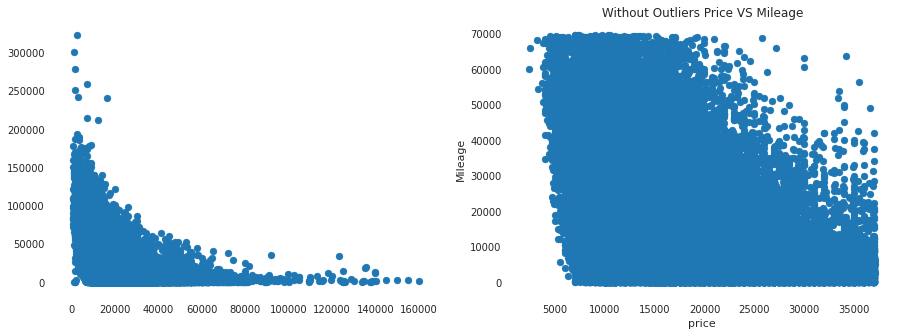

In [196]:
fig ,  ax = plt.subplots(1,2,figsize=(15, 5) )
ax[0].scatter( Carsdata.price ,  Carsdata.mileage)
ax[1].scatter( dff.price ,  dff.mileage)

plt.title(' Without Outliers Price VS Mileage ')
plt.xlabel('price')
plt.ylabel('Mileage')

* from the above graph we get to know that there is a negative corelation between the price and the mileage.

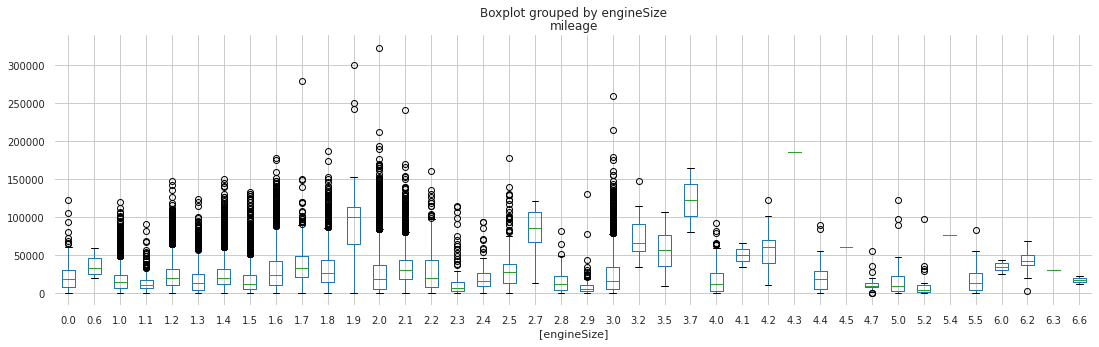

In [200]:
Carsdata.boxplot(['mileage' ],by= ['engineSize'] , figsize=(18 ,5))

* from the we get to know that cars with engineSize 1.9 , 2.7 , 3.7 are very good mileage.

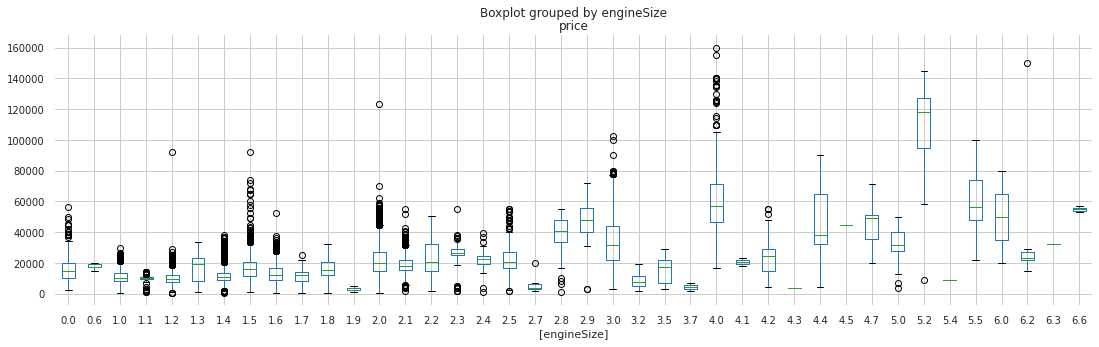

In [201]:
Carsdata.boxplot(['price' ],by= ['engineSize'] , figsize=(18 ,5))

* from above two boxplots we get know that 1.9 engineSize is cost efficent as well as has long on road life.
* and also engine sizes 4.0 and 5.2 are the most costly ones. 

In [202]:
Carsdata[Carsdata.engineSize == 1.9]

company  engineSize fuelType  mileage  ... price  tax  transmission  year
7404       audi         1.9   Diesel   152034  ...  2490  150        Manual  2009
9634       audi         1.9   Diesel   104000  ...  2795  145        Manual  2007
10037      audi         1.9   Diesel    92500  ...  3450  150        Manual  2008
10588      audi         1.9   Diesel   101000  ...  1490  240     Automatic  2003
9555        bmw         1.9   Petrol    74282  ...  3995  245        Manual  1999
9560        bmw         1.9   Petrol    51949  ...  3995  255        Manual  1999
9841        bmw         1.9   Petrol    49000  ...  3950  270        Manual  1997
9842        bmw         1.9   Petrol    56500  ...  3950  270        Manual  1998
9938        bmw         1.9   Petrol    58000  ...  3950  270        Manual  1999
5585      skoda         1.9   Diesel   250650  ...  1485  125        Manual  2010
5749      skoda         1.9   Diesel   104273  ...  2495  145        Manual  2008
5750      skoda         1.9   Diesel   109575  ...  2495   30        Manual  2010
5751      skoda         1.9   Diesel   107038  ...  2495  125        Manual  2009
6069      skoda         1.9   Diesel   300000  ...  1190  125        Manual  2010
6092      skoda         1.9   Diesel   241565  ...  2750  185     Automatic  2009
6134      skoda         1.9   Diesel   110265  ...  1500  145        Manual  2008
5425   vauxhall         1.9   Diesel    71000  ...  2499  200        Manual  2007
5865   vauxhall         1.9   Diesel    99000  ...  2250  160        Manual  2008
10780  vauxhall         1.9   Diesel   100000  ...  2395  235        Manual  2006
10818  vauxhall         1.9   Diesel   118000  ...  1995  205        Manual  2009
10843  vauxhall         1.9   Diesel    55000  ...  4875  305     Automatic  2010
10899  vauxhall         1.9   Diesel    56000  ...  2790  205        Manual  2006
13630  vauxhall         1.9   Diesel   131000  ...  1695  200     Automatic  2008
4824         vw         1.9   Diesel    92000  ...  3695  145        Manual  2008
5246         vw         1.9   Diesel        1  ...  1299  145        Manual  2008
13302        vw         1.9   Diesel   117000  ...  3195  150        Manual  2006
14405        vw         1.9   Diesel    88427  ...  3995  200        Manual  2007

[27 rows x 10 columns]

* from above we get the reason of engineSize 1.9 to be cheaper that is because it is an old modle when cars use to be cheaper as compaerd to now.
* The another reason of long road life is the fuel type that is 'Diesel', and transmission is 'Manual' , so it needs less fule . 

In [53]:
Carsdata[Carsdata.engineSize == 4.0].fuelType.value_counts()

Petrol    263
Diesel     94
Name: fuelType, dtype: int64

In [54]:
Carsdata[Carsdata.engineSize == 4.0].transmission.value_counts()

Semi-Auto    188
Automatic    165
Manual         4
Name: transmission, dtype: int64

* the reason of being so expensive of this engineSize 4.0 is the transmission i.e 'Semi-Auto' and 'Autometic'.

In [ ]:
Carsdata[Carsdata.engineSize == 5.2]

* the reason of being so expensive of this engineSize 5.2 is the transmission i.e 'Semi-Auto' and 'Autometic'.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73c11ec208>,
      dtype=object)

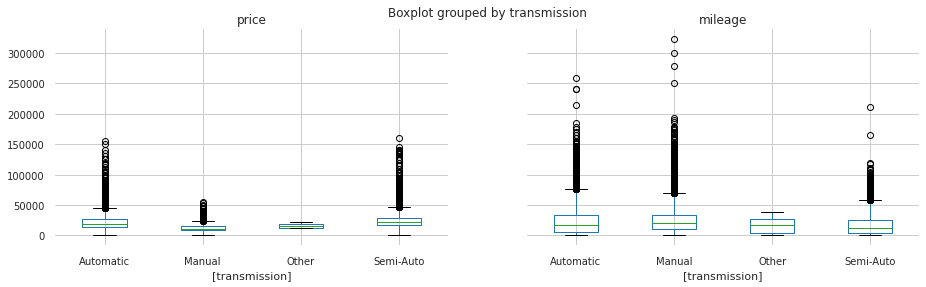

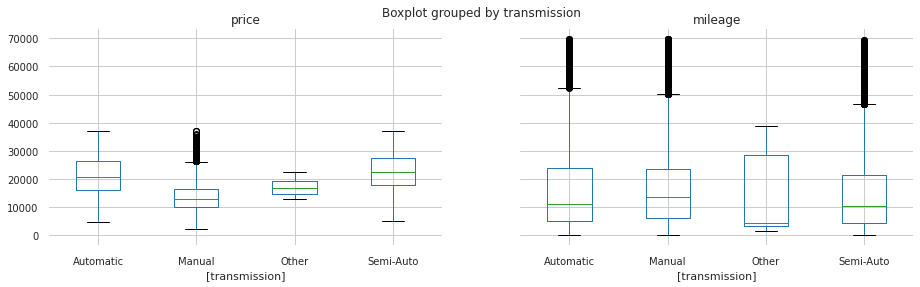

In [92]:
Carsdata.boxplot(['price','mileage'] , by = ['transmission'] , figsize=(15 , 4) )
dff.boxplot( ['price','mileage'] , by = ['transmission'] , figsize=(15 , 4) )

* Manual cars are cheaper and give good mileage were as Automatic and Semi-auto once are expensive and give less mileage.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73c0557ac8>,
      dtype=object)

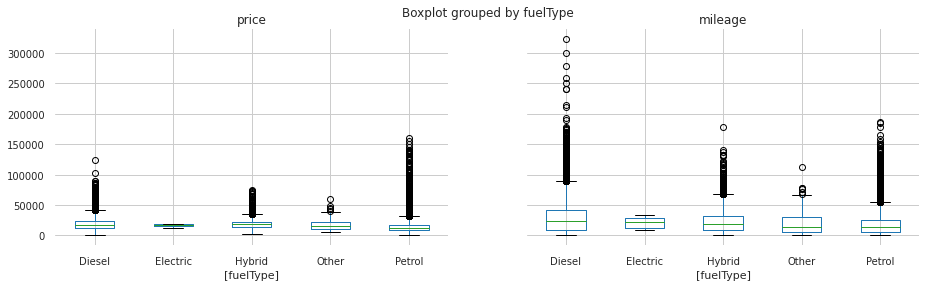

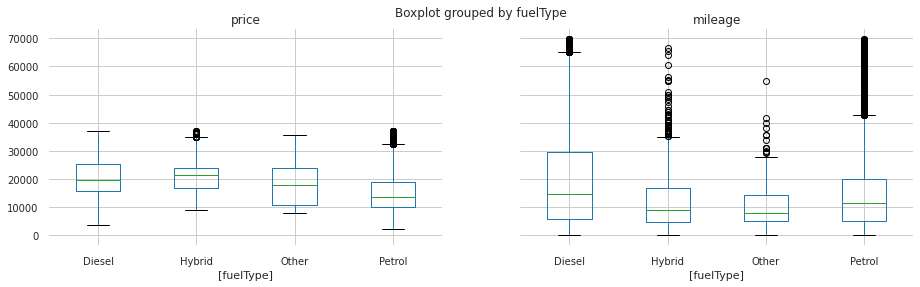

In [96]:
Carsdata.boxplot(['price','mileage'] , by= ['fuelType'] , figsize=(15 , 4) )
dff.boxplot(['price','mileage'], by= ['fuelType'] ,  figsize=(15 , 4) )

* cars with Hybrid & Diesel fueltype are expensive.
* cars with fueltype Petrol are less expensive.
* because of the fuel prices
  * cars with Diesel fueltype have more mileage
  * cars with Petrol fueltype have more mileage

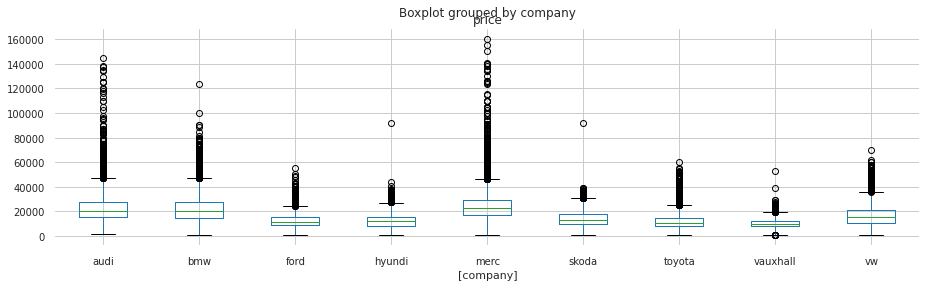

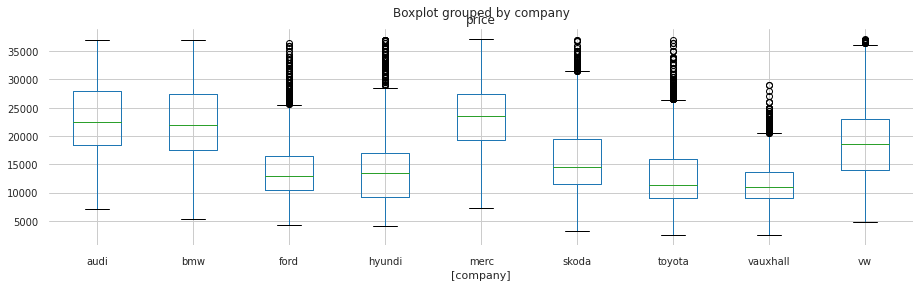

In [104]:
Carsdata.boxplot(['price']  , by= ['company'], figsize=(15 , 4) )
dff.boxplot(['price']  , by= ['company'], figsize=(15 , 4) )

* from the above graph we gets to know that 'merc','audi','bwm' are the top 3 companies thoes sell the most expensive cars.
* another thing we gets to know that is we want to go for budget friendly car than we shoul go with 'hyundai','ford','toyota'..

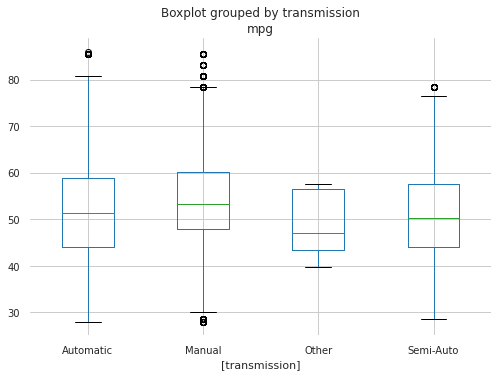

In [102]:
dff.boxplot(['mpg'] , by= ['transmission'])

* Manual cars give more mile per galen as comapared to other types.

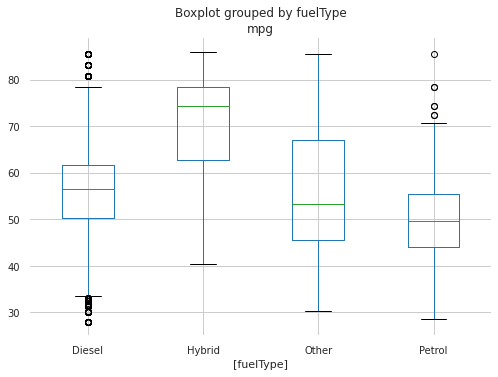

In [100]:
|dff.boxplot(['mpg'] , by= ['fuelType'])

* cars with hybrid fuelType give  more mpg.
* cars with petrol fuelType give  less mpg.

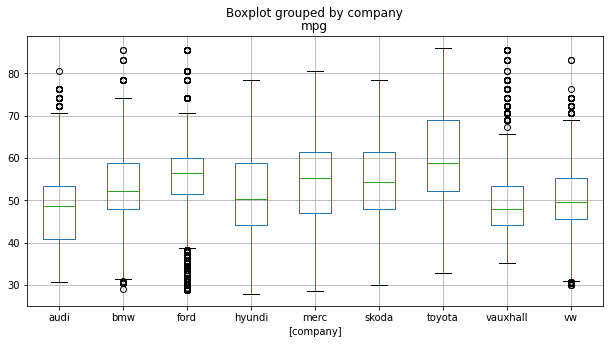

In [14]:
dff.boxplot(['mpg'] , by= ['company'] , figsize=(10 ,5))

* from over previous observations we know that toyota company sell the budget range cars. and 
* from this we graphs we get to know that 'toyota' cars gives good mpg as compaired to other companies.
* After toyota there is ford with same measures.



In [112]:
Carsdata.to_csv('WithOutliersCarsData.csv')
dff.to_csv('NoOutliersCarsData.csv')

In [73]:
dff.company.value_counts()

ford        12468
vauxhall     9804
vw           9569
merc         8314
bmw          6766
audi         6304
skoda        4750
toyota       3636
hyundi       3428
Name: company, dtype: int64

In [74]:
Carsdata.company.value_counts()

ford        17965
vw          15157
vauxhall    13632
merc        13119
bmw         10781
audi        10668
toyota       6738
skoda        6267
hyundi       4860
Name: company, dtype: int64

In [17]:
Carsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       99187 non-null  object 
 1   engineSize    99187 non-null  float64
 2   fuelType      99187 non-null  object 
 3   mileage       99187 non-null  int64  
 4   model         99187 non-null  object 
 5   mpg           99187 non-null  float64
 6   price         99187 non-null  int64  
 7   tax           99187 non-null  int64  
 8   transmission  99187 non-null  object 
 9   year          99187 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 10.8+ MB


* 

### **Data preprocessing**

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:
feature_data = Carsdata.drop(columns=['price','model'])      # data with outliers.
target_data = Carsdata.price
###############################################################
feature_data1 = dff.drop(columns=['price','model'])           # data without outliers
target_data1 = dff.price

In [81]:
cat_data = feature_data.select_dtypes(include=['object'])
print(cat_data.columns)
num_data = feature_data.select_dtypes(include=['int','float'])
print(num_data.columns)

Index(['company', 'fuelType', 'transmission'], dtype='object')
Index(['engineSize', 'mileage', 'mpg', 'tax', 'year'], dtype='object')


In [41]:
oe = OrdinalEncoder()
oe.fit(cat_data)
ss = StandardScaler()
ss.fit(num_data)
cat = pd.DataFrame(data = oe.transform(cat_data) , columns=cat_data.columns)
num = pd.DataFrame(data = ss.transform(num_data), columns= num_data.columns)

In [42]:
cat_pipeline = make_pipeline(OrdinalEncoder())
num_pipeline = make_pipeline(StandardScaler())

In [43]:
preprocessor = make_column_transformer(
              (cat_pipeline,cat_data.columns),
              (num_pipeline,num_data.columns)
)


In [44]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(feature_data, target_data)        # data with outliers
##########################################################################
trainX1, testX1, trainY1, testY1 = train_test_split(feature_data1, target_data1)     # data without outliers

### **Linear Regressor**

In [25]:
from sklearn.linear_model import LinearRegression

In [52]:
pipeline = make_pipeline(preprocessor, LinearRegression())

* data with outliers.

In [53]:
pipeline.fit( trainX , trainY)
print("Training Score : ",pipeline.score(trainX, trainY))
print('Testing Score : ',pipeline.score(testX, testY))
print('Root mean square error :',  sqrt(mean_squared_error(testY, pipeline.predict(testX))))

Training Score :  0.7168338523400828
Testing Score :  0.7136470335936909
Root mean square error : 5236.498455598688


* data without outliers.

In [54]:
pipeline.fit( trainX1 , trainY1)
print("Training Score : ", pipeline.score( trainX1, trainY1 ))
print('Testing Score : ', pipeline.score( testX1, testY1 ))
print('Root mean square error :', sqrt(mean_squared_error(testY1 , pipeline.predict( testX1 ))))

Training Score :  0.720330420618431
Testing Score :  0.7241829156434791
Root mean square error : 3766.2146804378176


### **Random Forest Regressor**

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf_pipeline = make_pipeline( preprocessor , RandomForestRegressor( n_estimators= 100 ))

* data with outliers.

In [58]:
rf_pipeline.fit( trainX , trainY)
print("Training Score : ",rf_pipeline.score(trainX, trainY))
print('Testing Score : ',rf_pipeline.score(testX, testY))
print('Root mean square error :',  sqrt(mean_squared_error(testY, rf_pipeline.predict(testX))))

Training Score :  0.9915705921381269
Testing Score :  0.9375126980089244
Root mean square error : 2446.166551206771


* data without outliers.

In [59]:
rf_pipeline.fit( trainX1 , trainY1)
print("Training Score : ", rf_pipeline.score( trainX1, trainY1 ))
print('Testing Score : ', rf_pipeline.score( testX1, testY1 ))
print('Root mean square error :', sqrt(mean_squared_error(testY1 , rf_pipeline.predict( testX1 ))))

Training Score :  0.989192375799508
Testing Score :  0.9300333427815696
Root mean square error : 1896.8808532241621


### **KNeighbors Regressor**

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
kn_pipeline = make_pipeline( preprocessor , KNeighborsRegressor(n_neighbors=4))

* data with outliers.

In [63]:
kn_pipeline.fit( trainX , trainY)
print("Training Score : ",kn_pipeline.score(trainX, trainY))
print('Testing Score : ',kn_pipeline.score(testX, testY))
print('Root mean square error :',  sqrt(mean_squared_error(testY, kn_pipeline.predict(testX))))

Training Score :  0.958301883040078
Testing Score :  0.9247060708461268
Root mean square error : 2685.1596789468044


* data without outliers.

In [64]:
kn_pipeline.fit( trainX1 , trainY1)
print("Training Score : ", kn_pipeline.score( trainX1, trainY1 ))
print('Testing Score : ', kn_pipeline.score( testX1, testY1 ))
print('Root mean square error :', sqrt(mean_squared_error(testY1 , kn_pipeline.predict( testX1 ))))

Training Score :  0.9529950810208364
Testing Score :  0.921246153663988
Root mean square error : 2012.4744586143656


### **Hyper parameter tuning using GridSearchCV**

In [65]:
from sklearn.model_selection import GridSearchCV

In [76]:
gs_pipeline = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100))

In [77]:
params = {'randomforestregressor__n_estimators':[100,200,250]}

In [78]:
gs = GridSearchCV(gs_pipeline, param_grid=params, cv=5, n_jobs=4)

* data with outliers.

In [79]:
gs.fit( trainX , trainY)
print("Training Score : ",gs.score(trainX, trainY))
print('Testing Score : ',gs.score(testX, testY))
print('Root mean square error :',  sqrt(mean_squared_error(testY, gs.predict(testX))))
print('******************************')
print('Best params :',gs.best_params_)
print('Best Score :', gs.best_score_ )

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Training Score :  0.9916112749670102
Testing Score :  0.9369149468217437
Root mean square error : 2457.838672617109
******************************
Best params : {'randomforestregressor__n_estimators': 200}
Best Score : 0.9412271405410373


* data without outliers.

In [80]:
gs.fit( trainX1 , trainY1)
print("Training Score : ", gs.score( trainX1, trainY1 ))
print('Testing Score : ', gs.score( testX1, testY1 ))
print('Root mean square error :', sqrt(mean_squared_error(testY1 , gs.predict( testX1 ))))
print('******************************')
print('Best params :', gs.best_params_)
print('Best Score :', gs.best_score_ )

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Training Score :  0.9894223215301897
Testing Score :  0.9303548891008215
Root mean square error : 1892.5170786318174
******************************
Best params : {'randomforestregressor__n_estimators': 250}
Best Score : 0.9280238063966098


* Conclusion 
  * getting the least RMSE of 1892.51 testing model with data without outliers in RendomForestRegress with n_estimetors :250 

### **Results**

In [85]:
result = pd.DataFrame()
result['actual'] = testY1
result['prediction'] = gs.predict( testX1)
result

actual    prediction
7605   26570  26508.864000
3854    7495   7820.188000
5277   28940  31992.559000
8262   11050  10473.516000
4273    9139   8755.884000
...      ...           ...
9083   12500  11123.204000
3723   13626  13891.810133
231    26995  25283.680000
5647   17250  16307.384000
4489   16780  16333.052000

[16260 rows x 2 columns]